<a href="https://colab.research.google.com/github/paulorfbr/deepReinforcementLearning/blob/cart-pole/OpenGym_CartPole.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gym

In [2]:
import gym

In [3]:
env = gym.make('CartPole-v0')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns 

In [4]:
env.reset()

array([-0.02478929, -0.03781115, -0.02784754, -0.03393257], dtype=float32)

In [5]:
# what do the state variables mean?
# Num Observation Min Max
# 0 Cart Position -2.4  2.4
# 1 Cart Velocity -Inf  Inf
# 2 Pole Angle  ~ -41.8°  ~ 41.8°
# 3 Pole Velocity At Tip  -Inf  Inf


In [6]:
box = env.observation_space

In [7]:
box

Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)

In [8]:
env.action_space

Discrete(2)

In [9]:
# pick an action
action = env.action_space.sample()

In [10]:
# do an action
observation, reward, done, info = env.step(action)

/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [11]:
env.action_space

Discrete(2)

In [12]:
#0 push to the left
#1 push to the right

In [13]:
# run through an episode
done = False
while not done:
  observation, reward, done, _ = env.step(env.action_space.sample())

**Random Search**

In [14]:
import gym
from gym import wrappers
import numpy as np
import matplotlib.pyplot as plt

In [15]:
def get_action(s, w):
  return 1 if s.dot(w) > 0 else 0

In [16]:
def play_one_episode(env, params):
  observation = env.reset()
  done = False
  t = 0

  while not done and t < 10000:
    # env.render()
    t += 1
    action = get_action(observation, params)
    observation, reward, done, info = env.step(action)
    if done:
      break

  return t

In [17]:
def play_multiple_episodes(env, T, params):
  episode_lengths = np.empty(T)

  for i in range(T):
    episode_lengths[i] = play_one_episode(env, params)

  avg_length = episode_lengths.mean()
  print("avg length:", avg_length)
  return avg_length

In [18]:
def random_search(env):
  episode_lengths = []
  best = 0
  params = None
  for t in range(100):
    new_params = np.random.random(4)*2 - 1
    avg_length = play_multiple_episodes(env, 100, new_params)
    episode_lengths.append(avg_length)

    if avg_length > best:
      params = new_params
      best = avg_length
  return episode_lengths, params

avg length: 87.35
avg length: 32.95
avg length: 8.89
avg length: 199.89
avg length: 9.03
avg length: 9.22
avg length: 200.0
avg length: 9.07
avg length: 9.31
avg length: 9.14
avg length: 9.02
avg length: 9.02
avg length: 9.25
avg length: 69.04
avg length: 119.18
avg length: 94.82
avg length: 152.92
avg length: 9.03
avg length: 8.83
avg length: 9.5
avg length: 27.25
avg length: 9.17
avg length: 8.87
avg length: 8.99
avg length: 115.05
avg length: 47.23
avg length: 182.93
avg length: 97.19
avg length: 28.87
avg length: 113.37
avg length: 9.35
avg length: 9.57
avg length: 50.43
avg length: 138.26
avg length: 70.11
avg length: 9.62
avg length: 9.18
avg length: 82.79
avg length: 12.54
avg length: 75.35
avg length: 9.2
avg length: 9.8
avg length: 179.65
avg length: 200.0
avg length: 9.09
avg length: 9.39
avg length: 8.97
avg length: 200.0
avg length: 68.93
avg length: 9.32
avg length: 9.35
avg length: 124.67
avg length: 9.51
avg length: 9.61
avg length: 162.88
avg length: 18.88
avg length: 1

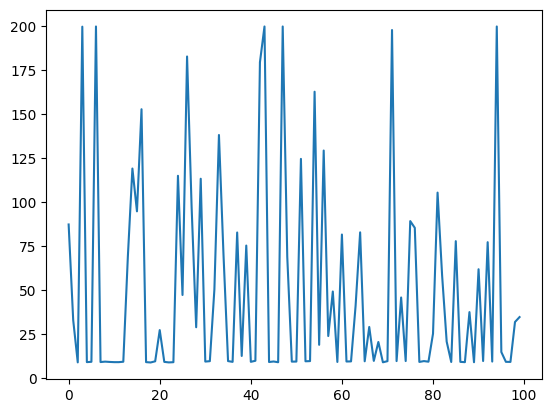

***Final run with final weights***


/usr/local/lib/python3.10/dist-packages/gym/wrappers/record_video.py:78: UserWarning: WARN: Overwriting existing videos at /content/cart-pole folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment CartPole-v0 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instea

avg length: 200.0


200.0

In [19]:
env = gym.make('CartPole-v0')
episode_lengths, params = random_search(env)
plt.plot(episode_lengths)
plt.show()

# play a final set of episodes
print("***Final run with final weights***")
# env = wrappers.Monitor(env, 'cart-pole')
env = wrappers.RecordVideo(env, 'cart-pole')
play_multiple_episodes(env, 100, params)

**Q learning bins**

In [20]:
import gym
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gym import wrappers
from datetime import datetime

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
# turns list of integers into an int
# Ex.
# build_state([1,2,3,4,5]) -> 12345
def build_state(features):
  return int("".join(map(lambda feature: str(int(feature)), features)))

def to_bin(value, bins):
  return np.digitize(x=[value], bins=bins)[0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
class FeatureTransformer:
  def __init__(self):
    # Note: to make this better you could look at how often each bin was
    # actually used while running the script.
    # It's not clear from the high/low values nor sample() what values
    # we really expect to get.
    self.cart_position_bins = np.linspace(-2.4, 2.4, 9)
    self.cart_velocity_bins = np.linspace(-2, 2, 9) # (-inf, inf) (I did not check that these were good values)
    self.pole_angle_bins = np.linspace(-0.4, 0.4, 9)
    self.pole_velocity_bins = np.linspace(-3.5, 3.5, 9) # (-inf, inf) (I did not check that these were good values)

  def transform(self, observation):
    # returns an int
    cart_pos, cart_vel, pole_angle, pole_vel = observation
    return build_state([
      to_bin(cart_pos, self.cart_position_bins),
      to_bin(cart_vel, self.cart_velocity_bins),
      to_bin(pole_angle, self.pole_angle_bins),
      to_bin(pole_vel, self.pole_velocity_bins),
    ])

In [23]:
class Model:
  def __init__(self, env, feature_transformer):
    self.env = env
    self.feature_transformer = feature_transformer

    num_states = 10**env.observation_space.shape[0]
    num_actions = env.action_space.n
    self.Q = np.random.uniform(low=-1, high=1, size=(num_states, num_actions))

  def predict(self, s):
    x = self.feature_transformer.transform(s)
    return self.Q[x]

  def update(self, s, a, G):
    x = self.feature_transformer.transform(s)
    self.Q[x,a] += 1e-2*(G - self.Q[x,a])

  def sample_action(self, s, eps):
    if np.random.random() < eps:
      return self.env.action_space.sample()
    else:
      p = self.predict(s)
      return np.argmax(p)


In [24]:
def play_one(model, eps, gamma):
  observation = env.reset()
  done = False
  totalreward = 0
  iters = 0
  while not done and iters < 10000:
    action = model.sample_action(observation, eps)
    prev_observation = observation
    observation, reward, done, info = env.step(action)

    totalreward += reward

    if done and iters < 199:
      reward = -300

    # update the model
    G = reward + gamma*np.max(model.predict(observation))
    model.update(prev_observation, action, G)

    iters += 1

  return totalreward


def plot_running_avg(totalrewards):
  N = len(totalrewards)
  running_avg = np.empty(N)
  for t in range(N):
    running_avg[t] = totalrewards[max(0, t-100):(t+1)].mean()
  plt.plot(running_avg)
  plt.title("Running Average")
  plt.show()

/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/record_video.py:78: UserWarning: WARN: Overwriting existing videos at /content/cart-pole-bins folder (try specifying a different `video_folder` for th

episode: 0 total reward: 14.0 eps: 1.0


/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment CartPole-v0 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment CartPole-v0 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initial

episode: 100 total reward: 29.0 eps: 0.09950371902099892


/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment CartPole-v0 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


episode: 200 total reward: 44.0 eps: 0.07053456158585983


/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment CartPole-v0 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


episode: 300 total reward: 68.0 eps: 0.0576390417704235


/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment CartPole-v0 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


episode: 400 total reward: 25.0 eps: 0.04993761694389223
episode: 500 total reward: 58.0 eps: 0.04467670516087703


/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment CartPole-v0 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


episode: 600 total reward: 172.0 eps: 0.04079085082240021
episode: 700 total reward: 128.0 eps: 0.0377694787300249


/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment CartPole-v0 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


episode: 800 total reward: 130.0 eps: 0.03533326266687867
episode: 900 total reward: 124.0 eps: 0.03331483023263848


/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment CartPole-v0 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


episode: 1000 total reward: 107.0 eps: 0.0316069770620507
episode: 1100 total reward: 199.0 eps: 0.03013743873394561
episode: 1200 total reward: 127.0 eps: 0.028855492841238062
episode: 1300 total reward: 200.0 eps: 0.027724348650071385
episode: 1400 total reward: 77.0 eps: 0.02671658425726324
episode: 1500 total reward: 110.0 eps: 0.025811286645983367
episode: 1600 total reward: 117.0 eps: 0.02499219116020307
episode: 1700 total reward: 200.0 eps: 0.024246432248443597
episode: 1800 total reward: 57.0 eps: 0.02356368148131365
episode: 1900 total reward: 200.0 eps: 0.02293553851298437


/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment CartPole-v0 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


episode: 2000 total reward: 103.0 eps: 0.022355091700494795
episode: 2100 total reward: 104.0 eps: 0.021816595214404266
episode: 2200 total reward: 200.0 eps: 0.021315227815974374
episode: 2300 total reward: 91.0 eps: 0.02084690996125416
episode: 2400 total reward: 184.0 eps: 0.02040816326530612
episode: 2500 total reward: 140.0 eps: 0.01999600119960014
episode: 2600 total reward: 200.0 eps: 0.0196078431372549
episode: 2700 total reward: 200.0 eps: 0.019241446072101123
episode: 2800 total reward: 179.0 eps: 0.018894849871330582
episode: 2900 total reward: 129.0 eps: 0.018566333001716968


/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment CartPole-v0 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


episode: 3000 total reward: 200.0 eps: 0.01825437644092281
episode: 3100 total reward: 200.0 eps: 0.017957634043632188
episode: 3200 total reward: 200.0 eps: 0.01767490804100673
episode: 3300 total reward: 149.0 eps: 0.01740512865461766
episode: 3400 total reward: 200.0 eps: 0.017147337032429676
episode: 3500 total reward: 127.0 eps: 0.01690067088544646
episode: 3600 total reward: 200.0 eps: 0.016664352333993333
episode: 3700 total reward: 200.0 eps: 0.016437677572823703
episode: 3800 total reward: 200.0 eps: 0.01622000804188198
episode: 3900 total reward: 200.0 eps: 0.01601076285016887


/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment CartPole-v0 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


episode: 4000 total reward: 131.0 eps: 0.015809412247806517
episode: 4100 total reward: 135.0 eps: 0.015615471979112765
episode: 4200 total reward: 132.0 eps: 0.015428498379527544
episode: 4300 total reward: 157.0 eps: 0.015248084103296531
episode: 4400 total reward: 101.0 eps: 0.015073854388204487
episode: 4500 total reward: 162.0 eps: 0.014905463779355262
episode: 4600 total reward: 200.0 eps: 0.014742593246782542
episode: 4700 total reward: 200.0 eps: 0.014584947642137372
episode: 4800 total reward: 200.0 eps: 0.014432253448298278
episode: 4900 total reward: 200.0 eps: 0.014284256782850143


/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment CartPole-v0 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(


avg reward for last 100 episodes: 164.49
total steps: 702835.0


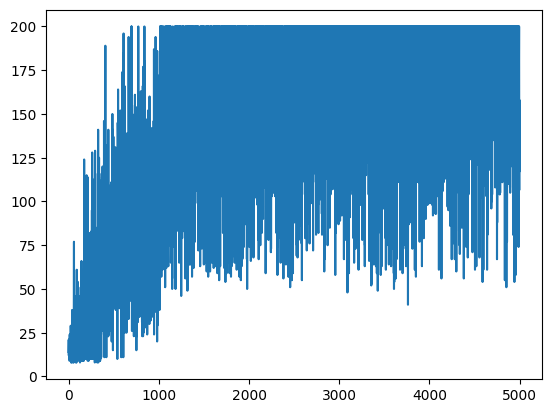

In [25]:
env = gym.make('CartPole-v0')
ft = FeatureTransformer()
model = Model(env, ft)
gamma = 0.9

filename = 'cart-pole-bins'
monitor_dir = './' + filename + '_' + str(datetime.now())
env = wrappers.RecordVideo(env, 'cart-pole-bins')

N = 5000
totalrewards = np.empty(N)
for n in range(N):
    eps = 1.0/np.sqrt(n+1)
    totalreward = play_one(model, eps, gamma)
    totalrewards[n] = totalreward
    if n % 100 == 0:
      print("episode:", n, "total reward:", totalreward, "eps:", eps)
print("avg reward for last 100 episodes:", totalrewards[-100:].mean())
print("total steps:", totalrewards.sum())

plt.plot(totalrewards)